In [1]:
from numpy import linspace, arange, zeros
from control import c2d, tf
import matplotlib.pyplot as plt

In [2]:
T = 0.15
Gs = tf(1, [1, 1])

Gz = c2d(Gs, T)

Gz

TransferFunction(array([0.13929202]), array([ 1.        , -0.86070798]), 0.15)

In [3]:
Hs = tf([1],[1, 0])
GHs = Gs*Hs

GHz = c2d(GHs, T)

GHz

TransferFunction(array([0.01070798, 0.01018583]), array([ 1.        , -1.86070798,  0.86070798]), 0.15)

In [4]:
Cs = tf([5.175, -4.455],[1, -0.5388], T)

Cs

TransferFunction(array([ 5.175, -4.455]), array([ 1.    , -0.5388]), 0.15)

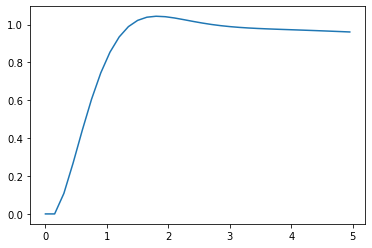

In [5]:
# C:
#e[k] = r[k] - v[k]
#u[k] = 5.175*e[k] - 4.455*e[k-1] + 0.5388*u[k-1]

#G:
#c[k] = 0.1393*u[k-1] + 0.8607c[k-1]

#GH:
#v[k] = 0.01071*u[k1] + 1.861*v[k-1] + 0.01019*u[k-2] - 0.8607*v[k-2]

Tf = 5
kmax = int(5/T)+1
t = T*arange(0, kmax)
r = T*arange(0, kmax)

u = zeros(kmax)
c = zeros(kmax)
v = zeros(kmax)
e = r - v

v[1] = 0.01071*u[0] + 1.861*v[0]
e[1] = r[1] - v[1]
u[1] = 5.175*e[1] - 4.455*e[0] + 0.5388*u[0]
c[1] = 0.1393*u[0] + 0.8607*c[0]

for k in range(2, kmax):
    v[k] = 0.01071*u[k-1] + 1.861*v[k-1] + 0.01019*u[k-2] - 0.8607*v[k-2]
    e[k] = r[k] - v[k]
    u[k] = 5.175*e[k] - 4.455*e[k-1] + 0.5388*u[k-1]
    c[k] = 0.1393*u[k-1] + 0.8607*c[k-1]
    
plt.plot(t, c)

In [23]:
T=.2

Cz = tf(0.1813, [1, -0.8187], T)
Cz

TransferFunction(array([0.1813]), array([ 1.    , -0.8187]), 0.2)

In [25]:
Gs = tf(1, [1, 5])
Gz = c2d(Gs, T)
Gz

TransferFunction(array([0.12642411]), array([ 1.        , -0.36787944]), 0.2)

In [30]:
GH = Cz*Gz

K = GH(1)
ess = 1/(1+K)
ess

(0.8333333333333334+0j)